# Lab 7 

### Groupby, some Merging and some Plotting

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
url = ('https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/' +
      'master/titanic-train.csv')
titanic = pd.read_csv(url)

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Check for null
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
titanic.shape

(891, 12)

In [6]:
#Get average age by class for imputation
titanic.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [7]:
#Function for imputing age
def age_approx(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        else:
            return 25
    else:
        return Age

In [8]:
titanic['Age'] = titanic[['Age', 'Pclass']].apply(age_approx, axis=1)

In [9]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
total_passengers = titanic.groupby('Pclass')['PassengerId'].count().reset_index()
total_passengers.head()

,Pclass,PassengerId
0,1,216
1,2,184
2,3,491


In [11]:
survived_by_class = titanic.groupby('Pclass')['Survived'].apply(lambda x: (x==1).sum()).reset_index()
survived_by_class.head()

,Pclass,Survived
0,1,136
1,2,87
2,3,119


In [12]:
survived_df = survived_by_class.merge(total_passengers,how='left',on='Pclass')
survived_df.head()

,Pclass,Survived,PassengerId
0,1,136,216
1,2,87,184
2,3,119,491


In [13]:
survived_df['% Survived']=survived_df['Survived']/survived_df['PassengerId']
survived_df.head()

,Pclass,Survived,PassengerId,% Survived
0,1,136,216,0.629630
1,2,87,184,0.472826
2,3,119,491,0.242363


In [14]:
type(total_passengers)

pandas.core.frame.DataFrame

##### Can do merge in one large step

In [15]:
survived_df_onestep = titanic.groupby(
    'Pclass')['Survived'].apply(lambda x: (x==1).sum()).reset_index().merge(
    titanic.groupby('Pclass')['PassengerId'].count().reset_index(),
            how='left',on='Pclass')



In [16]:
survived_df_onestep['% Class'] = survived_df_onestep['Survived']/survived_df_onestep['PassengerId']
survived_df_onestep.head()

,Pclass,Survived,PassengerId,% Class
0,1,136,216,0.629630
1,2,87,184,0.472826
2,3,119,491,0.242363


In [17]:
titanic.groupby(['Pclass','Survived'])['PassengerId'].count().reset_index()

,Pclass,Survived,PassengerId
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


In [18]:
titanic.groupby('Sex')['Survived'].apply(lambda x: (x==1).sum())

Sex
female    233
male      109
Name: Survived, dtype: int64

In [19]:
titanic.groupby(['Survived','Sex'])['Pclass'].apply(lambda x: (x==1).sum()).reset_index()

,Survived,Sex,Pclass
0,0,female,3
1,0,male,77
2,1,female,91
3,1,male,45


In [20]:
titanic.groupby(['Survived','Sex'])['Pclass'].apply(lambda x: (x==3).sum()).reset_index()

,Survived,Sex,Pclass
0,0,female,72
1,0,male,300
2,1,female,72
3,1,male,47


In [21]:
Age_Class = titanic.groupby(['Survived','Sex'])['Age'].mean().reset_index()

Age_Class

,Survived,Sex,Age
0,0,female,25.037037
1,0,male,30.610043
2,1,female,28.798283
3,1,male,27.630000


In [22]:
titanic.groupby('Survived')['Age','Fare','PassengerId'].agg(
    {'Age':'mean','Fare':'mean','PassengerId':'count'}).reset_index()

,Survived,Age,Fare,PassengerId
0,0,29.787796,22.117887,549
1,1,28.425936,48.395408,342


In [23]:
survived_df.head()

,Pclass,Survived,PassengerId,% Survived
0,1,136,216,0.629630
1,2,87,184,0.472826
2,3,119,491,0.242363


#### Plotting

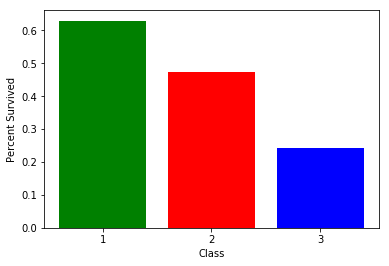

In [24]:
fig, ax = plt.subplots()
color = ['g','r','b']
ax.bar(survived_df['Pclass'],survived_df['% Survived'],color=color)
ax.set_xlabel('Class')
ax.set_ylabel('Percent Survived')
ax.set_xticks(survived_df['Pclass']);

In [25]:
#https://pbpython.com/effective-matplotlib.html

In [34]:
titanic['Fare'].mean()

32.2042079685746

In [46]:
titanic['passenger_fare'] = titanic['PassengerId'].count()*titanic['Fare'].mean()